In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


In [3]:
dfIceCream = pd.read_csv('ice_cream.csv')

In [4]:
dfIceCream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [5]:
dfIceCream.rename(columns = {'IPN31152N':'production','DATE':'date'},inplace = True)

In [6]:
dfIceCream['date'] = pd.to_datetime(dfIceCream.date)

In [7]:
dfIceCream.set_index('date',inplace=True)


In [8]:
startDate = pd.to_datetime('2010-01-01')
dfIceCream = dfIceCream[startDate:]

In [9]:
dfIceCream.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


In [10]:
dfIceCream.iloc[-1]

production    83.629
Name: 2020-01-01 00:00:00, dtype: float64

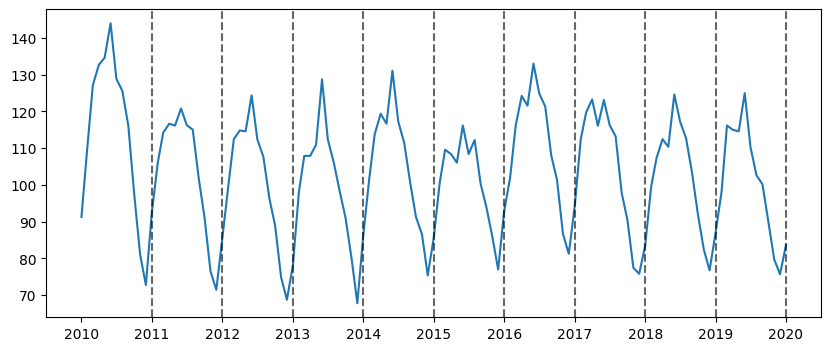

In [11]:
plt.figure(figsize = (10,4))
plt.plot(dfIceCream.production)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(f'{year}-01-01'),linestyle='--',color='k',alpha = 0.6)

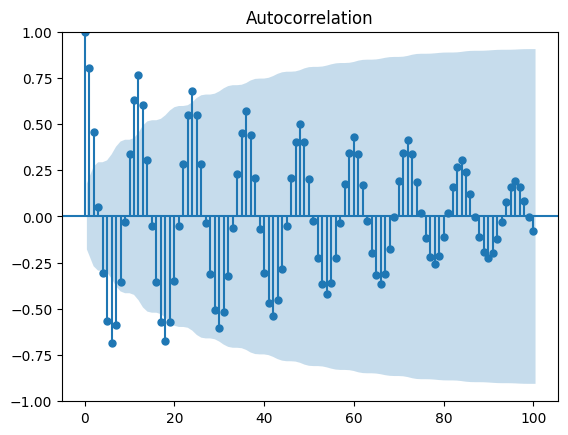

In [12]:
acfPlot = plot_acf(dfIceCream.production,lags = 100)

c:\Users\91988\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


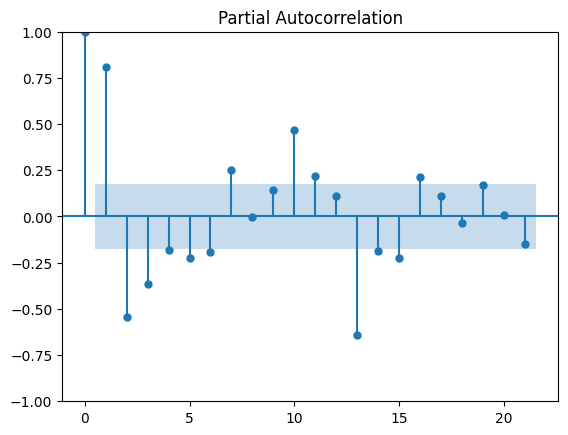

In [13]:
pacfPlot = plot_pacf(dfIceCream.production)

In [14]:
import yfinance as yf

In [15]:
tickerSymbol = 'SPY'

In [16]:
tickerData = yf.Ticker(tickerSymbol)

In [17]:
tickerDf = tickerData.history(period = '1d',start = '2015-1-1',end = '2020-1-1')
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2015-01-02 00:00:00-05:00,178.284289,178.716221,176.383778,177.463608,121465900,0.0,0.0,0.0
2015-01-05 00:00:00-05:00,176.375116,176.547886,173.939026,174.258652,169632600,0.0,0.0,0.0
2015-01-06 00:00:00-05:00,174.578240,175.122479,171.787964,172.617279,209151400,0.0,0.0,0.0
2015-01-07 00:00:00-05:00,173.999548,175.122574,173.533067,174.768387,125346700,0.0,0.0,0.0
2015-01-08 00:00:00-05:00,176.236896,178.094211,176.219628,177.869598,147217800,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2019-12-24 00:00:00-05:00,306.453786,306.501439,305.910404,306.225006,20270000,0.0,0.0,0.0
2019-12-26 00:00:00-05:00,306.625261,307.864553,306.615747,307.855011,30911200,0.0,0.0,0.0
2019-12-27 00:00:00-05:00,308.617677,308.674872,307.225883,307.778778,42528800,0.0,0.0,0.0


In [18]:
tickerDf = tickerDf[['Close']]

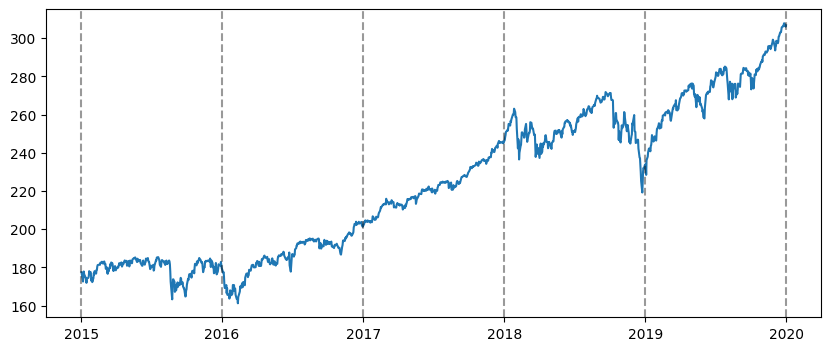

In [19]:
plt.figure(figsize = (10,4))
plt.plot(tickerDf.Close)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(f'{year}-01-01'),linestyle='--',color='k',alpha=0.4)

In [20]:
#getting currentDay - prevDay values
firstDiff = tickerDf.Close.values[1:] - tickerDf.Close.values[:-1]
firstDiff = np.concatenate([firstDiff,[0]])

In [21]:
tickerDf['FirstDifference'] = firstDiff

C:\Users\91988\AppData\Local\Temp\ipykernel_2532\1228253428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tickerDf['FirstDifference'] = firstDiff


In [22]:
tickerDf.head()

,Close,FirstDifference
Date,,
2015-01-02 00:00:00-05:00,177.463608,-3.204956
2015-01-05 00:00:00-05:00,174.258652,-1.641373
2015-01-06 00:00:00-05:00,172.617279,2.151108
2015-01-07 00:00:00-05:00,174.768387,3.101212
2015-01-08 00:00:00-05:00,177.869598,-1.425369


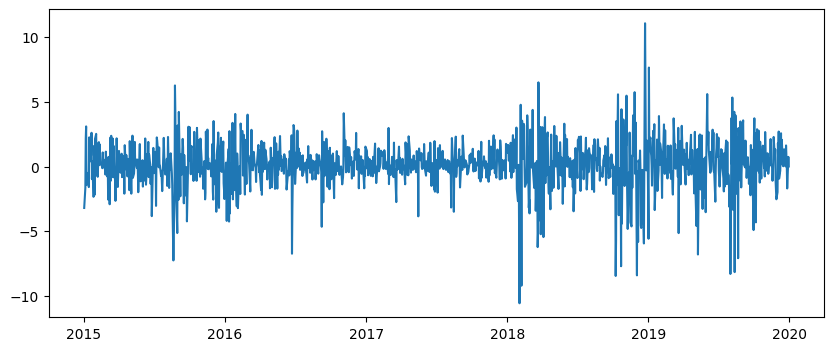

In [23]:
plt.figure(figsize = (10,4))
plt.plot(tickerDf.FirstDifference)

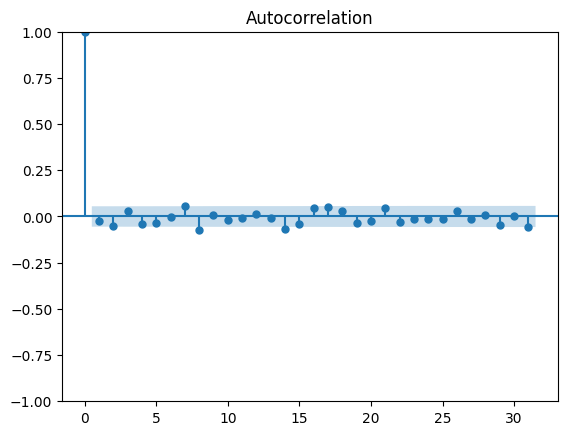

In [24]:
acfPlot = plot_acf(tickerDf.FirstDifference)

c:\Users\91988\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


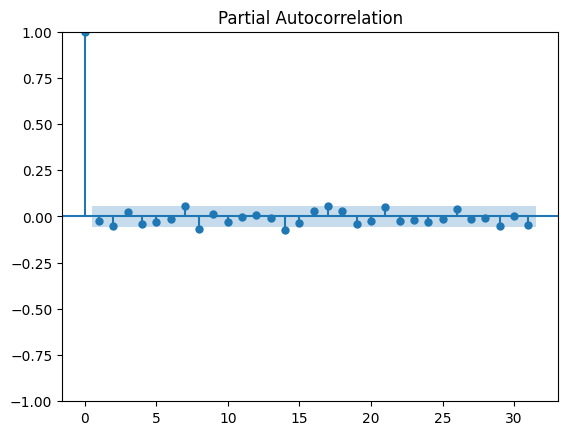

In [25]:
pacfPlot = plot_pacf(tickerDf.FirstDifference)